In [2]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
    library(Matrix)
    library(Seurat)
    library(R.utils)
})

# Setting up data

Retrieve Seurat Object

In [3]:
cd34_df <- readRDS(file = 'hultCD34_full.RDS')
cd34_df

An object of class Seurat 
41569 features across 58041 samples within 1 assay 
Active assay: RNA (41569 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 dimensional reduction calculated: umap

See Shape of Object

In [4]:
head(cd34_df)

orig.ident    nCount_RNA nFeature_RNA sample age    cluster    
BM1_bcBSQM SeuratProject 5125       2140         BM1    25yr-1 Uncommitted
BM1_bcCHLB SeuratProject 5050       2116         BM1    25yr-1 Uncommitted
BM1_bcFZFC SeuratProject 4761       2024         BM1    25yr-1 Uncommitted
BM1_bcGZEW SeuratProject 4119       1754         BM1    25yr-1 Uncommitted
BM1_bcFMRM SeuratProject 4575       1952         BM1    25yr-1 Uncommitted
BM1_bcGXJU SeuratProject 4285       1993         BM1    25yr-1 Uncommitted
BM1_bcCGNZ SeuratProject 4158       1882         BM1    25yr-1 Uncommitted
BM1_bcFFAD SeuratProject 3629       1853         BM1    25yr-1 Uncommitted
BM1_bcAIXH SeuratProject 3720       1760         BM1    25yr-1 Uncommitted
BM1_bcDEPL SeuratProject 3564       1683         BM1    25yr-1 Uncommitted
           broad_age_range narrow_age_range subcluster
BM1_bcBSQM Adult           Adult            MPP-1     
BM1_bcCHLB Adult           Adult            HSC       
BM1_bcFZFC Adult           Adult            MPP-1     
BM1_bcGZEW Adult           Adult            HSC       
BM1_bcFMRM Adult           Adult            MPP-1     
BM1_bcGXJU Adult           Adult            MPP-1     
BM1_bcCGNZ Adult           Adult            MPP-1     
BM1_bcFFAD Adult           Adult            MPP-1     
BM1_bcAIXH Adult           Adult            MPP-1     
BM1_bcDEPL Adult           Adult            Mk/E-MPP

In [5]:
nrow(cd34_df)

[1] 41569

In [6]:
ncol(cd34_df)

[1] 58041

Allign Usage scores with Seurat object

In [7]:
cd34_df_alt <- subset(cd34_df, subset = nFeature_RNA >= 200)
cd34_df_alt

An object of class Seurat 
41569 features across 57678 samples within 1 assay 
Active assay: RNA (41569 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 1 dimensional reduction calculated: umap

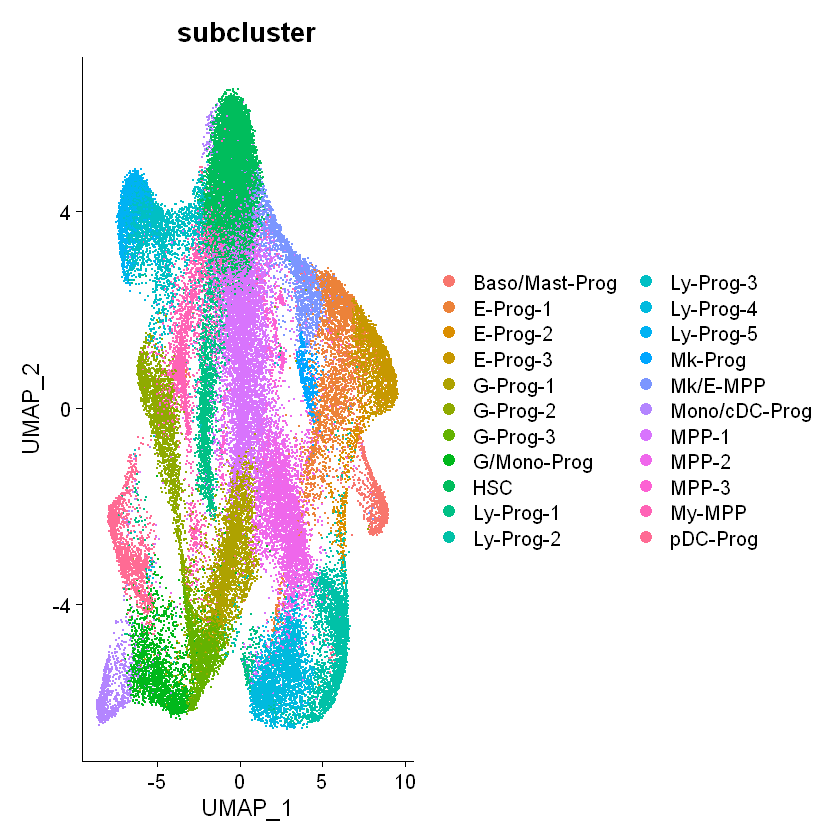

In [8]:
DimPlot(cd34_df_alt, reduction = 'umap', group.by = 'subcluster')

In [9]:
head(cd34_df_alt)

orig.ident    nCount_RNA nFeature_RNA sample age    cluster    
BM1_bcBSQM SeuratProject 5125       2140         BM1    25yr-1 Uncommitted
BM1_bcCHLB SeuratProject 5050       2116         BM1    25yr-1 Uncommitted
BM1_bcFZFC SeuratProject 4761       2024         BM1    25yr-1 Uncommitted
BM1_bcGZEW SeuratProject 4119       1754         BM1    25yr-1 Uncommitted
BM1_bcFMRM SeuratProject 4575       1952         BM1    25yr-1 Uncommitted
BM1_bcGXJU SeuratProject 4285       1993         BM1    25yr-1 Uncommitted
BM1_bcCGNZ SeuratProject 4158       1882         BM1    25yr-1 Uncommitted
BM1_bcFFAD SeuratProject 3629       1853         BM1    25yr-1 Uncommitted
BM1_bcAIXH SeuratProject 3720       1760         BM1    25yr-1 Uncommitted
BM1_bcDEPL SeuratProject 3564       1683         BM1    25yr-1 Uncommitted
           broad_age_range narrow_age_range subcluster
BM1_bcBSQM Adult           Adult            MPP-1     
BM1_bcCHLB Adult           Adult            HSC       
BM1_bcFZFC Adult           Adult            MPP-1     
BM1_bcGZEW Adult           Adult            HSC       
BM1_bcFMRM Adult           Adult            MPP-1     
BM1_bcGXJU Adult           Adult            MPP-1     
BM1_bcCGNZ Adult           Adult            MPP-1     
BM1_bcFFAD Adult           Adult            MPP-1     
BM1_bcAIXH Adult           Adult            MPP-1     
BM1_bcDEPL Adult           Adult            Mk/E-MPP

In [10]:
cd34_metadata <-cd34_df_alt@meta.data
cd34_metadata

orig.ident    nCount_RNA nFeature_RNA sample age    cluster    
BM1_bcBSQM    SeuratProject 5125       2140         BM1    25yr-1 Uncommitted
BM1_bcCHLB    SeuratProject 5050       2116         BM1    25yr-1 Uncommitted
BM1_bcFZFC    SeuratProject 4761       2024         BM1    25yr-1 Uncommitted
BM1_bcGZEW    SeuratProject 4119       1754         BM1    25yr-1 Uncommitted
BM1_bcFMRM    SeuratProject 4575       1952         BM1    25yr-1 Uncommitted
BM1_bcGXJU    SeuratProject 4285       1993         BM1    25yr-1 Uncommitted
BM1_bcCGNZ    SeuratProject 4158       1882         BM1    25yr-1 Uncommitted
BM1_bcFFAD    SeuratProject 3629       1853         BM1    25yr-1 Uncommitted
BM1_bcAIXH    SeuratProject 3720       1760         BM1    25yr-1 Uncommitted
BM1_bcDEPL    SeuratProject 3564       1683         BM1    25yr-1 Uncommitted
BM1_bcBLXF    SeuratProject 3334       1551         BM1    25yr-1 Uncommitted
BM1_bcDBND    SeuratProject 3233       1558         BM1    25yr-1 Uncommitted
BM1_bcGTRD    SeuratProject 3169       1527         BM1    25yr-1 Uncommitted
BM1_bcBDVL    SeuratProject 3355       1606         BM1    25yr-1 Uncommitted
BM1_bcCMUW    SeuratProject 3044       1457         BM1    25yr-1 Uncommitted
BM1_bcHFBQ    SeuratProject 3111       1476         BM1    25yr-1 Uncommitted
BM1_bcEFZJ    SeuratProject 2942       1340         BM1    25yr-1 Uncommitted
BM1_bcFNXA    SeuratProject 2893       1499         BM1    25yr-1 Uncommitted
BM1_bcDBSV    SeuratProject 2496       1222         BM1    25yr-1 Uncommitted
BM1_bcDKTO    SeuratProject 2281       1163         BM1    25yr-1 Uncommitted
BM1_bcGDGP    SeuratProject 2237       1062         BM1    25yr-1 Uncommitted
BM1_bcBTKA    SeuratProject 2078       1066         BM1    25yr-1 Uncommitted
BM1_bcBXOY    SeuratProject 1863       1049         BM1    25yr-1 Uncommitted
BM1_bcEVLI    SeuratProject 1711        911         BM1    25yr-1 Uncommitted
BM1_bcEKLR    SeuratProject  995        617         BM1    25yr-1 Uncommitted
BM1_bcDSFQ    SeuratProject 6054       3077         BM1    25yr-1 Granulocyte
BM1_bcGAEH    SeuratProject 5371       2616         BM1    25yr-1 Uncommitted
BM1_bcBPEM    SeuratProject 5596       2272         BM1    25yr-1 Uncommitted
BM1_bcCKYZ    SeuratProject 4465       2002         BM1    25yr-1 Uncommitted
BM1_bcFQYE    SeuratProject 4122       1980         BM1    25yr-1 Uncommitted
⋮             ⋮             ⋮          ⋮            ⋮      ⋮      ⋮          
Samp26_bcDLYH SeuratProject  907       613          Samp26 53yr   Lymphoid   
Samp26_bcFYJB SeuratProject  969       700          Samp26 53yr   Monocyte/DC
Samp26_bcEKIA SeuratProject  981       620          Samp26 53yr   Lymphoid   
Samp26_bcDDUV SeuratProject 1430       748          Samp26 53yr   Monocyte/DC
Samp26_bcFESJ SeuratProject 1002       676          Samp26 53yr   Lymphoid   
Samp26_bcBQAA SeuratProject  987       646          Samp26 53yr   Monocyte/DC
Samp26_bcAEAQ SeuratProject  977       739          Samp26 53yr   Lymphoid   
Samp26_bcDBVR SeuratProject 1009       739          Samp26 53yr   Uncommitted
Samp26_bcBXAL SeuratProject  764       549          Samp26 53yr   Lymphoid   
Samp26_bcFFGF SeuratProject  900       668          Samp26 53yr   Granulocyte
Samp26_bcHICW SeuratProject  884       683          Samp26 53yr   Monocyte/DC
Samp26_bcGPHQ SeuratProject  821       584          Samp26 53yr   Lymphoid   
Samp26_bcCXID SeuratProject  778       567          Samp26 53yr   Lymphoid   
Samp26_bcGFQZ SeuratProject  806       623          Samp26 53yr   Lymphoid   
Samp26_bcBGBL SeuratProject  883       663          Samp26 53yr   Lymphoid   
Samp26_bcDFUY SeuratProject  795       580          Samp26 53yr   Lymphoid   
Samp26_bcBKJT SeuratProject  802       605          Samp26 53yr   Granulocyte
Samp26_bcFMAS SeuratProject  657       505          Samp26 53yr   Uncommitted
Samp26_bcCSHA SeuratProject  613       464          Samp26 53yr   Lymphoid   
Samp26_bcFRVV SeuratProject  555    

In [11]:
nrow(cd34_df_alt)

[1] 41569

In [12]:
rownames(cd34_df_alt)

[1] "X5S-rRNA"               "X5-8S-rRNA"            
    [3] "X7SK"                   "A1BG"                  
    [5] "A1BG.AS1"               "A1CF"                  
    [7] "A2M"                    "A2M.AS1"               
    [9] "A2ML1"                  "A2ML1.AS1"             
   [11] "A2ML1.AS2"              "A3GALT2"               
   [13] "A4GALT"                 "A4GNT"                 
   [15] "AA06"                   "AAAS"                  
   [17] "AACS"                   "AADAC"                 
   [19] "AADACL2"                "AADACL2.AS1"           
   [21] "AADACL3"                "AADACL4"               
   [23] "AADAT"                  "AAED1"                 
   [25] "AAGAB"                  "AAK1"                  
   [27] "AAMDC"                  "AAMP"                  
   [29] "AANAT"                  "AAR2"                  
   [31] "AARD"                   "AARS"                  
   [33] "AARS2"                  "AARSD1"                
   [35] "AASDH"                  "AASDHPPT"              
   [37] "AASS"                   "AATBC"                 
   [39] "AATF"                   "AATK"                  
   [41] "AATK.AS1"               "AB015752.3"            
   [43] "AB019440.50"            "ABALON"                
   [45] "ABAT"                   "ABC11.4932300O16.1"    
   [47] "ABC12.49244600F4.4"     "ABC13.47488600E17.1"   
   [49] "ABC13.47656900H15.1"    "ABC14.1188822O7.1"     
   [51] "ABC7.42404400C24.1"     "ABC7.481722F1.2"       
   [53] "ABCA1"                  "ABCA10"                
   [55] "ABCA12"                 "ABCA13"                
   [57] "ABCA2"                  "ABCA3"                 
   [59] "ABCA4"                  "ABCA5"                 
   [61] "ABCA6"                  "ABCA7"                 
   [63] "ABCA8"                  "ABCA9"                 
   [65] "ABCA9.AS1"              "ABCB1"                 
   [67] "ABCB10"                 "ABCB11"                
   [69] "ABCB4"                  "ABCB5"                 
   [71] "ABCB6"                  "ABCB7"                 
   [73] "ABCB8"                  "ABCB9"                 
   [75] "ABCC1"                  "ABCC10"                
   [77] "ABCC11"                 "ABCC12"                
   [79] "ABCC2"                  "ABCC3"                 
   [81] "ABCC4"                  "ABCC5"                 
   [83] "ABCC5.AS1"              "ABCC6"                 
   [85] "ABCC8"                  "ABCC9"                 
   [87] "ABCD1"                  "ABCD2"                 
   [89] "ABCD3"                  "ABCD4"                 
   [91] "ABCE1"                  "ABCF1"                 
   [93] "ABCF2"                  "ABCF3"                 
   [95] "ABCG1"                  "ABCG2"                 
   [97] "ABCG4"                  "ABCG5"                 
   [99] "ABCG8"                  "ABHD1"                 
  [101] "ABHD10"                 "ABHD11"                
  [103] "ABHD11.AS1"             "ABHD12"                
  [105] "ABHD12B"                "ABHD13"                
  [107] "ABHD14A"                "ABHD14B"               
  [109] "ABHD15"                 "ABHD15.AS1"            
  [111] "ABHD16A"                "ABHD16B"               
  [113] "ABHD17A"                "ABHD17B"               
  [115] "ABHD17C"                "ABHD18"                
  [117] "ABHD2"                  "ABHD3"                 
  [119] "ABHD4"                  "ABHD5"                 
  [121] "ABHD6"                  "ABHD8"                 
  [123] "ABI1"                   "ABI2"                  
  [125] "ABI3"                   "ABI3BP"                
  [127] "ABL1"                   "ABL2"                  
  [129] "ABLIM1"                 "ABLIM2"                
  [131] "ABLIM3"                 "ABO"                   
  [133] "ABR"                    "ABRA"                  
  [135] "ABRACL"                 "ABT1"                  
  [137] "ABTB1"                  "ABTB2"                 
  

In [13]:
ncol(cd34_df_alt)

[1] 57678

In [14]:
colnames(cd34_df_alt)

[1] "BM1_bcBSQM"    "BM1_bcCHLB"    "BM1_bcFZFC"    "BM1_bcGZEW"   
    [5] "BM1_bcFMRM"    "BM1_bcGXJU"    "BM1_bcCGNZ"    "BM1_bcFFAD"   
    [9] "BM1_bcAIXH"    "BM1_bcDEPL"    "BM1_bcBLXF"    "BM1_bcDBND"   
   [13] "BM1_bcGTRD"    "BM1_bcBDVL"    "BM1_bcCMUW"    "BM1_bcHFBQ"   
   [17] "BM1_bcEFZJ"    "BM1_bcFNXA"    "BM1_bcDBSV"    "BM1_bcDKTO"   
   [21] "BM1_bcGDGP"    "BM1_bcBTKA"    "BM1_bcBXOY"    "BM1_bcEVLI"   
   [25] "BM1_bcEKLR"    "BM1_bcDSFQ"    "BM1_bcGAEH"    "BM1_bcBPEM"   
   [29] "BM1_bcCKYZ"    "BM1_bcFQYE"    "BM1_bcAXGQ"    "BM1_bcGDZJ"   
   [33] "BM1_bcEXNN"    "BM1_bcEBUX"    "BM1_bcCJTW"    "BM1_bcHELD"   
   [37] "BM1_bcDZLG"    "BM1_bcGHVH"    "BM1_bcCOCU"    "BM1_bcDKEX"   
   [41] "BM1_bcDQWJ"    "BM1_bcEMUU"    "BM1_bcHBXW"    "BM1_bcGNCF"   
   [45] "BM1_bcCYKW"    "BM1_bcAKDA"    "BM1_bcECZM"    "BM1_bcAKKM"   
   [49] "BM1_bcBGJD"    "BM1_bcBEDB"    "BM1_bcEVAM"    "BM1_bcADRL"   
   [53] "BM1_bcCIAQ"    "BM1_bcHAAB"    "BM1_bcCKVD"    "BM1_bcFJNY"   
   [57] "BM1_bcASKS"    "BM1_bcHGZS"    "BM1_bcIBEL"    "BM1_bcGERB"   
   [61] "BM1_bcFRIT"    "BM1_bcDDED"    "BM1_bcAQDP"    "BM1_bcFLXH"   
   [65] "BM1_bcDXZW"    "BM1_bcGORZ"    "BM1_bcDBZZ"    "BM1_bcFTTL"   
   [69] "BM1_bcEFWO"    "BM1_bcIGNO"    "BM1_bcCPIR"    "BM1_bcEJAN"   
   [73] "BM1_bcCWDQ"    "BM1_bcBJYL"    "BM1_bcGBZI"    "BM1_bcCJAM"   
   [77] "BM1_bcEXLD"    "BM1_bcASGV"    "BM1_bcHAHZ"    "BM1_bcHCUF"   
   [81] "BM1_bcDOOK"    "BM1_bcGUAT"    "BM1_bcEFHO"    "BM1_bcGIMX"   
   [85] "BM1_bcHOSH"    "BM1_bcDRST"    "BM1_bcCKGC"    "BM1_bcFDIP"   
   [89] "BM1_bcEMLH"    "BM1_bcEGWO"    "BM1_bcAGBA"    "BM1_bcDHEV"   
   [93] "BM1_bcDIZQ"    "BM1_bcDVWV"    "BM1_bcCIXR"    "BM1_bcBCOO"   
   [97] "BM1_bcGRBN"    "BM1_bcBBSC"    "BM1_bcAWBM"    "BM1_bcCVFK"   
  [101] "BM1_bcEPDG"    "BM1_bcDVFC"    "BM1_bcBJEF"    "BM1_bcEJKB"   
  [105] "BM1_bcGJOG"    "BM1_bcAQGA"    "BM1_bcEQXC"    "BM1_bcDUHZ"   
  [109] "BM1_bcCXSJ"    "BM1_bcBVXW"    "BM1_bcATGY"    "BM1_bcAHPJ"   
  [113] "BM1_bcGURE"    "BM1_bcGCSS"    "BM1_bcIBAC"    "BM1_bcGCLH"   
  [117] "BM1_bcGUSE"    "BM1_bcGDPL"    "BM1_bcAXDG"    "BM1_bcCNKM"   
  [121] "BM1_bcDCLR"    "BM1_bcAGDA"    "BM1_bcCWXR"    "BM1_bcCZYX"   
  [125] "BM1_bcAEUV"    "BM1_bcEJMT"    "BM1_bcAZHG"    "BM1_bcCZGG"   
  [129] "BM1_bcENUV"    "BM1_bcDNRP"    "BM1_bcEMZV"    "BM1_bcBRCI"   
  [133] "BM1_bcEFTL"    "BM1_bcFCRJ"    "BM1_bcAOEU"    "BM1_bcHUPS"   
  [137] "BM1_bcGDWO"    "BM1_bcFOAM"    "BM1_bcGZZM"    "BM1_bcABTZ"   
  [141] "BM1_bcBKIP"    "BM1_bcBRQF"    "BM1_bcHHJD"    "BM1_bcFIEM"   
  [145] "BM1_bcETCD"    "BM1_bcHSKO"    "BM1_bcCZDZ"    "BM1_bcFQWJ"   
  [149] "BM1_bcFRNQ"    "BM1_bcETGN"    "BM1_bcGNEX"    "BM1_bcELSD"   
  [153] "BM1_bcCKFO"    "BM1_bcAJYU"    "BM1_bcCYJU"    "BM1_bcCTXC"   
  [157] "BM1_bcFTVE"    "BM1_bcBRNE"    "BM1_bcBXKH"    "BM1_bcDRPJ"   
  [161] "BM1_bcBERW"    "BM1_bcGGUM"    "BM1_bcDEJV"    "BM1_bcEIFX"   
  [165] "BM1_bcGOLJ"    "BM1_bcCKKZ"    "BM1_bcAGEJ"    "BM1_bcAWCC"   
  [169] "BM1_bcFPFK"    "BM1_bcFBMU"    "BM1_bcBGXT"    "BM1_bcBQEX"   
  [173] "BM1_bcGNVK"    "BM1_bcCSHN"    "BM1_bcAGDG"    "BM1_bcBQDA"   
  [177] "BM1_bcCZRW"    "BM1_bcCUWO"    "BM1_bcHKTD"    "BM1_bcHFOJ"   
  [181] "BM1_bcEZPR"    "BM1_bcCJNU"    "BM1_bcGHCK"    "BM1_bcBIDP"   
  [185] "BM1_bcCUYA"    "BM1_bcFWGW"    "BM1_bcCYGS"    "BM1_bcERRJ"   
  [189] "BM1_bcGDGD"    "BM1_bcFIYN"    "BM1_bcBELS"    "BM1_bcEUTE"   
  [193] "BM1_bcAOZD"    "BM1_bcFTLQ"    "BM1_bcHPSS"    "BM1_bcDWAA"   
  [197] "BM1_bcEBCK"    "BM1_bcFLAV"    "BM1_bcDARR"    "BM1_bcAUJL"   
  [201] "BM1_bcBHBT"    "BM1_bcFGHC"    "BM1_bcFNVD"    "BM1_bcERNP"   
  [205] "BM1_bcIBPM"    "BM1_bcBQPE"    "BM1_bcDTBX"    "BM1_bcBNKT"   
  [209] "BM1_bcEIYZ"    "BM1_bcCZCC"    "BM1_bcHGUD"    "BM1_bcIFSO"   
  [213] "BM1_bcHOGH"    "BM1_bcGMDL"    "BM1_bcDINA"    "BM1_bcFKHK"   
  [217] "BM1_bcBRCU"    "BM1_bcDMOK"    "BM1_bcCXFS"    "BM1_bcGGEM"   
  [221] "BM1_bcHGXK"    "BM1_bcCQVW"    "BM1

Import .CSV and .TXT

Contribution scores

In [15]:
gcontri <- read.csv('cNMF4.gene_spectra_score.k_35.dt_0_15.csv')
head(gcontri)

X          X1            X2           X3            X4           
1 X5S-rRNA    5.215443e-05 1.160166e-04  0.0002631377 -1.587250e-04
2 X5-8S-rRNA -1.032737e-04 6.266084e-06 -0.0001078793 -5.282883e-05
3 X7SK       -1.550153e-05 1.397282e-04  0.0004614752 -1.799080e-04
4 A1BG        1.713120e-04 1.172760e-04 -0.0001887819 -1.574418e-04
5 A1BG.AS1    1.167979e-04 1.490527e-04  0.0003941750  5.803493e-05
6 A1CF       -3.439168e-04 4.918848e-04  0.0002551298 -7.664977e-04
  X5            X6            X7            X8            X9            ⋯
1  4.938455e-06 -7.843986e-05 -6.766551e-05  1.330586e-04  1.280320e-05 ⋯
2 -1.810045e-05 -5.597497e-05 -2.298117e-05 -3.558847e-05  1.216252e-05 ⋯
3 -2.091271e-05 -8.265021e-05 -1.075865e-05  1.094554e-04  9.229493e-05 ⋯
4  5.871120e-05  5.445101e-04 -2.630053e-04 -3.999144e-05  2.996525e-05 ⋯
5 -3.003544e-05 -4.687981e-05  9.120460e-05  7.565343e-05 -4.369140e-05 ⋯
6  3.251176e-04  2.330592e-04  4.269903e-04  7.036040e-04  2.264259e-04 ⋯
  X26           X27           X28           X29           X30          
1  1.799670e-06  1.341165e-04 -1.269255e-04  4.967611e-04  6.872893e-05
2 -1.891749e-05 -9.935343e-06 -8.536151e-05  5.172354e-04  7.919151e-06
3  5.798593e-06 -8.567729e-05  2.014042e-04  5.181986e-05  8.888510e-05
4  1.421461e-04  4.836029e-05  5.519363e-05 -1.441073e-04 -2.566768e-05
5  2.693748e-04 -3.104788e-04  1.028818e-04 -1.043390e-04  8.243176e-05
6 -3.953722e-04  8.912246e-04  2.968651e-04 -5.483327e-04  1.248161e-04
  X31           X32           X33          X34           X35          
1  9.281787e-05  1.992555e-05 0.0001388540 -1.191682e-04 -1.625454e-04
2 -5.743228e-06 -2.593165e-05 0.0000944562 -6.522805e-05 -2.598399e-05
3  1.553226e-04 -5.117353e-05 0.0001067649 -2.161764e-04 -1.706900e-04
4  1.131585e-04 -9.373671e-05 0.0001222186  3.254582e-05 -5.137559e-05
5  3.574973e-05 -7.103878e-05 0.0001610157 -2.797133e-04 -6.823877e-05
6  3.310588e-04 -1.899539e-04 0.0006368520  2.223891e-04  1.729103e-04

In [16]:
ncol(gcontri)

[1] 36

In [17]:
nrow(gcontri)

[1] 40040

Usage Scores (Matched with Seurat)

In [18]:
gusage <- read.csv('cNMF4.usages.k_35.dt_0_15.consensus.txt', sep = "\t")
head(gusage)

X X1        X2       X3        X4        X5         X6 X7       X8      
1 0  9.941066 7.260921 3.3711902 125.56252 0.00000000 0  0.000000 0.000000
2 1  3.385921 0.000000 0.0000000 138.28459 0.00000000 0  6.527998 3.731253
3 2 17.131093 0.000000 1.6503145 108.64642 0.00000000 0  0.000000 2.185833
4 3 10.196783 7.091310 0.0000000 116.12457 0.00000000 0  0.000000 2.052106
5 4 10.558019 0.000000 0.0000000  77.04998 0.01437185 0  0.000000 0.000000
6 5  4.361720 4.910504 0.3209329  88.65972 0.00000000 0  2.105235 1.206985
  X9         ⋯ X26        X27      X28      X29        X30        X31     
1  0.0000000 ⋯ 17.6822378 48.59546 0.000000 0.00000000  3.9553691 2.747324
2  5.2496763 ⋯  0.0000000 13.66827 0.000000 0.00000000  0.7068670 5.087958
3 13.0362756 ⋯  0.5868283 16.04337 0.000000 0.01266879  2.8724054 0.000000
4  7.1358222 ⋯  0.9337780 25.49619 0.000000 0.00000000  0.0000000 0.000000
5  0.0000000 ⋯  0.0000000 26.07317 0.000000 0.00000000  0.8132218 0.000000
6  0.5108796 ⋯  8.6622283 25.24980 8.718013 0.00000000 18.0475174 0.000000
  X32       X33       X34      X35     
1  0.000000  8.490743 0.000000  0.00000
2  5.798068 70.375836 0.000000  0.00000
3  0.000000 40.924850 2.587133  0.00000
4  9.795166  0.000000 0.000000 13.44561
5 11.509362 49.045850 0.000000  0.00000
6  0.000000 90.266050 0.000000  0.00000

In [19]:
ncol(gusage)

[1] 36

In [20]:
nrow(gusage)

[1] 57678

Interesting GEPs
- GEP1 – Monocyte Lineage
- GEP4 – Elderly-biased HSC
- GEP6 – Late-Erythroid Lineage
- GEP14 – Basophil/Mast Cell Lineage
- GEP25 – Dendritic Cell Lineage
- GEP26 – Lymphoid Lineage
- GEP28 – Fetal-biased HSC
- GEP30 – Granulocyte Lineage
- GEP32 – Erythroid Lineage

*taken from cols*

In [21]:
cluster_data <- cd34_metadata$cluster
unique(cluster_data)

[1] "Uncommitted"   "Granulocyte"   "Lymphoid"      "Monocyte/DC"  
[5] "Erythroid"     "Megakaryocyte" "Basophil/Mast"

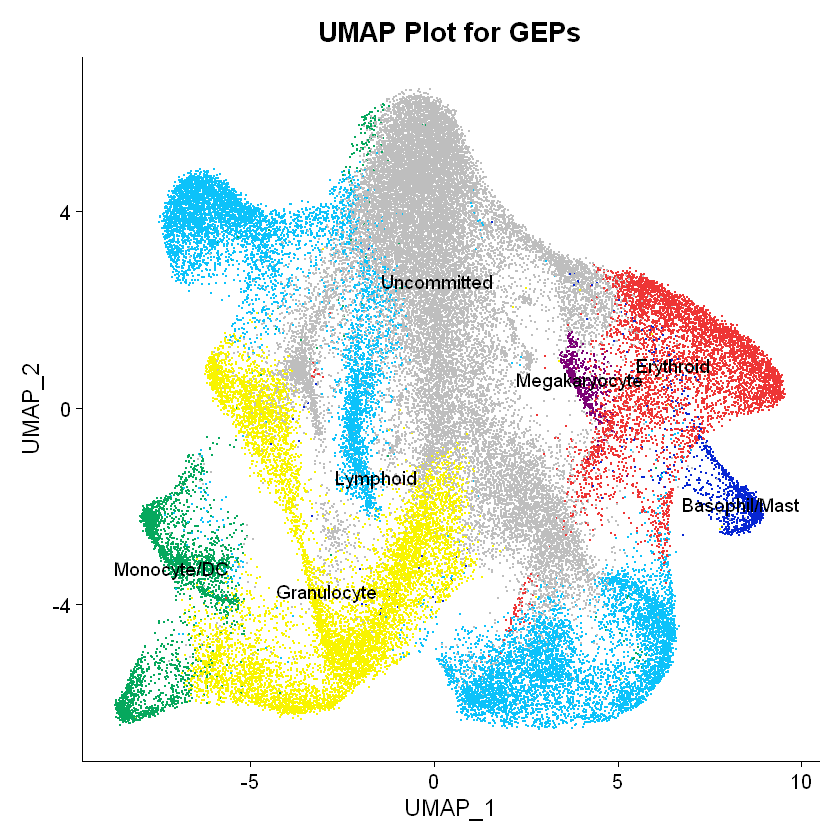

In [22]:
UMAPPlot(cd34_df_alt, group.by = "cluster", label = TRUE,
cols = c(
  "Uncommitted" = "grey",
  "Erythroid" = "#ee35358c",
  "Basophil/Mast" = "#0726d3cb",
  "Granulocyte" = "#f8f400b4",
  "Lymphoid" = "#0cc2fa",
  "Megakaryocyte" = "#7c0276",
  "Monocyte/DC" = "#06a85dcc"
)) + 
theme(legend.position = "none") +
labs(title = "UMAP Plot for GEPs")

# *CAT Analysis

Interesting GEPs
- GEP1 – Monocyte Lineage
- GEP4 – Elderly-biased HSC
- GEP6 – Late-Erythroid Lineage
- GEP14 – Basophil/Mast Cell Lineage
- GEP25 – Dendritic Cell Lineage
- GEP26 – Lymphoid Lineage
- GEP28 – Fetal-biased HSC
- GEP30 – Granulocyte Lineage
- GEP32 – Erythroid Lineage

*taken from cols*

Rename cd34_df_alt 

In [23]:
cd34 <- cd34_df_alt

View Metadata

In [24]:
cd34@meta.data %>% colnames

[1] "orig.ident"       "nCount_RNA"       "nFeature_RNA"     "sample"          
[5] "age"              "cluster"          "broad_age_range"  "narrow_age_range"
[9] "subcluster"

In [25]:
length(cd34@assays$RNA@var.features)

[1] 2000

In [26]:
# counts = cd34@assays$RNA@counts

In [27]:
# counts[1:5, 1:5]

In [28]:
print(dim(cd34@assays$RNA@counts))

[1] 41569 57678


In [29]:
# # Verify dimensions of the RNA assay's count matrix
# if (dim(cd34@assays$RNA@counts)[1] == 0 || dim(cd34@assays$RNA@counts)[2] == 0) {
#   stop("Error: The Seurat object's count matrix has zero features or zero cells.")
# } else {
#   message("Count matrix dimensions: ", dim(cd34@assays$RNA@counts)[1], " features by ", dim(cd34@assays$RNA@counts)[2], " cells.")
# }

# # Ensure variable features are selected correctly
# VariableFeatures(cd34) <- VariableFeatures(cd34)[VariableFeatures(cd34) %in% rownames(cd34@assays$RNA@counts)]

# # Check if any variable features remain after filtering
# if (length(VariableFeatures(cd34)) == 0) {
#   stop("Error: No valid variable features found. Check if FindVariableFeatures has been executed and returned features.")
# } else {
#   message("Number of variable features: ", length(VariableFeatures(cd34)))
# }

# # Proceed to scale the data, handling potential empty features gracefully
# tryCatch({
#   cd34 <- ScaleData(cd34, features = VariableFeatures(cd34))
#   message("Data scaling completed successfully.")
# }, error = function(e) {
#   message("Data scaling failed: ", e$message)
# })

In [30]:
cd34@meta.data %>% colnames

[1] "orig.ident"       "nCount_RNA"       "nFeature_RNA"     "sample"          
[5] "age"              "cluster"          "broad_age_range"  "narrow_age_range"
[9] "subcluster"

In [31]:
cd34@assays$RNA@var.features

[1] "HBB"                "CLC"                "PF4"               
   [4] "HMOX1"              "LYZ"                "HBA2"              
   [7] "BOLL"               "S100A8"             "SNORA71C"          
  [10] "PPBP"               "HBG2"               "IGFBP3"            
  [13] "S100A9"             "ELANE"              "RP11.872D17.8"     
  [16] "PRTN3"              "HBG1"               "MT1G"              
  [19] "RFC4"               "CTSG"               "RP5.915N17.11"     
  [22] "CLDN20"             "HSPA1B"             "HBA1"              
  [25] "IL17RE"             "MAGI1.AS1"          "AZU1"              
  [28] "MPO"                "C1QA"               "HSPA1A"            
  [31] "HBD"                "CCER1"              "CXCL8"             
  [34] "H19"                "CA1"                "HOXA.AS2"          
  [37] "RN7SL600P"          "RP11.435O5.7"       "MT1H"              
  [40] "RABGGTA"            "RNASE1"             "MIR4513"           
  [43] "AC008073.7"         "DUOX1"              "XX.C2158C6.3"      
  [46] "C1QB"               "OR4C13"             "COL3A1"            
  [49] "MS4A2"              "LINC00459"          "ARHGAP19"          
  [52] "ALB"                "SCGB2B2"            "PTF1A"             
  [55] "MAPK15"             "NAT8"               "HBM"               
  [58] "PEAR1"              "AFP"                "MIP"               
  [61] "RN7SKP108"          "PRG2"               "AXIN2"             
  [64] "RP5.1195D24.1"      "FAM179B"            "APOA2"             
  [67] "RN7SKP164"          "AHSG"               "CCL4"              
  [70] "RP11.498C9.3"       "CD24"               "RP11.547C5.2"      
  [73] "HIST1H4C"           "GAS8.AS1"           "FUZ"               
  [76] "NNAT"               "COLEC11"            "OIT3"              
  [79] "DNTT"               "TCP10L2"            "ENTPD1.AS1"        
  [82] "SERPINA1"           "RP11.298I3.6"       "SLC34A1"           
  [85] "LRRC26"             "LTB"                "AFAP1L1"           
  [88] "FABP1"              "RP11.355I22.5"      "FCGR3A"            
  [91] "MT1E"               "VPS35"              "IRX6"              
  [94] "APOC2"              "FAM178B"            "AHSP"              
  [97] "FTL"                "AC018685.1"         "APOA1"             
 [100] "RP11.59N23.3"       "RNASE2"             "CTGF"              
 [103] "WDR54"              "LMO4"               "ADAMTS19.AS1"      
 [106] "AK5"                "APOC3"              "SRGN"              
 [109] "CCL4L2"             "FGB"                "FAM132A"           
 [112] "RP11.379K22.2"      "G0S2"               "RP11.139H15.5"     
 [115] "ELAVL2"             "AC005618.6"         "C1QC"              
 [118] "ALOXE3"             "RP11.158L12.6"      "GPR158"            
 [121] "AGT"                "HIST1H3F"           "RP11.884K10.6"     
 [124] "SNORA31"            "MEGF6"              "CTC.251D13.1"      
 [127] "AOC1"               "RP13.753N3.1"       "AC118754.4"        
 [130] "SPP1"               "IGKC"               "HSPA1L"            
 [133] "LINC00460"          "AREG"               "GPC3"              
 [136] "ZNF37A"             "TTR"                "MT2A"              
 [139] "RP11.498M15.1"      "RP11.132A1.3"       "ATP6V1C2"          
 [142] "VSIG4"              "APOE"               "TMEM132E"          
 [145] "RP4.633O19--A.1"    "RP11.35J10.6"       "RN7SKP212"         
 [148] "MT1F"               "FCN1"               "ATP2B2.IT2"        
 [151] "SNX25"              "NKX2.2.AS1"         "CTA.223H9.9"       
 [154] "AC105053.3"         "MAFB"               "RP11.109E10.1"     
 [157] "SPATA3.AS1"         "ZMIZ2"              "DAND5"             
 [160] "RP13.638C3.2"       "APOH"               "THBS1"             
 [163] "AC092625.1"         "RP11.900F13.3"      "RP11.661A12.9"     
 [166] "ZNF148"             "TH"                 "RP11.750H9.5"      
 [169] "LGMN"               "HBZ"                "ZNF98"             
 [172] "AC130

In [32]:
# counts_alt = cd34@assays$RNA@counts

In [33]:
# dim(counts_alt)

In [34]:
# counts_alt[1:5, 1:5]

In [35]:
# dim(counts_alt)

In [36]:
# length(barcodes)

In [37]:
# counts_fn

Try to convert csv to txt (correct file type)

### DIMS mismatch

Gene Spectra Score: 
- dim: 36 x 40040
    - gene names: 40040
    - GEPs : 35

Matrix: 
- dim: 41569 x 57678
    - barcodes: 57678
    - gene names: 41569
- variable features: 2000

Less reference genes than Matrix

Try to find intersection. Courtesey of ChatGPT


In [38]:
length(rownames(cd34))

[1] 41569

In [39]:
rownames(cd34)[1:5]

[1] "X5S-rRNA"   "X5-8S-rRNA" "X7SK"       "A1BG"       "A1BG.AS1"

In [40]:
library(readr)

In [41]:
write.table(gcontri, "cNMF4.gene_spectra_score.k_35.dt_0_15.txt", sep = "\t", col.names = FALSE, row.names = FALSE, quote = FALSE)

gcontri_t <- t(gcontri)

write.table(gcontri_t, "cNMF4.gene_spectra_score.k_35.dt_0_15_t.txt", sep = "\t", col.names = FALSE, row.names = FALSE, quote = FALSE)

In [42]:
ncol(gcontri)

[1] 36

In [43]:
nrow(gcontri)

[1] 40040

In [44]:
rownames(gcontri) <- gcontri$X

In [45]:
gcontri <- gcontri[, -1, drop = FALSE]

In [46]:
rownames(gcontri)[1:5]

[1] "X5S-rRNA"   "X5-8S-rRNA" "X7SK"       "A1BG"       "A1BG.AS1"

In [47]:
# gcontri[1:5][1:5]

In [48]:
common_genes <- intersect(rownames(cd34), rownames(gcontri))

In [49]:
length(common_genes)

[1] 40012

In [50]:
cd34_int <- subset(cd34, features = common_genes)

In [51]:
dim(cd34_int)

[1] 40012 57678

Change to correct dataset..

In [78]:
spectra.t <- read.table("cNMF4.spectra.k_35.dt_0_15.consensus.txt", header = TRUE, sep = "\t")
spectra.t

X  ABCA13       ABHD17B      ABHD8        ABLIM1       AC002480.5  
1   1 4.037138e-04 1.290061e-04 0.000000e+00 0.000000e+00 0.000000e+00
2   2 1.626081e-03 1.903653e-04 5.273402e-04 6.913273e-04 4.248614e-04
3   3 4.665727e-08 1.557317e-04 0.000000e+00 8.398596e-04 3.834534e-04
4   4 3.927303e-04 1.156419e-03 3.044580e-04 3.585300e-03 0.000000e+00
5   5 1.485559e-05 0.000000e+00 6.923341e-04 2.612954e-04 0.000000e+00
6   6 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
7   7 6.565215e-04 0.000000e+00 0.000000e+00 3.875568e-04 1.135598e-03
8   8 1.233864e-03 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
9   9 4.239189e-06 0.000000e+00 1.606618e-04 2.035585e-04 5.098308e-04
10 10 5.547900e-04 5.059033e-04 0.000000e+00 8.596243e-04 0.000000e+00
11 11 1.217689e-03 9.022430e-04 5.632150e-04 1.347342e-03 4.308050e-04
12 12 8.531845e-04 5.170983e-04 0.000000e+00 9.847204e-04 1.098482e-03
13 13 4.184893e-04 2.215734e-06 2.289249e-04 5.981672e-04 6.013995e-04
14 14 0.000000e+00 4.535662e-04 7.293096e-05 0.000000e+00 2.844888e-04
15 15 0.000000e+00 1.590199e-03 1.446419e-04 8.208146e-04 0.000000e+00
16 16 1.108845e-04 4.847891e-05 4.153462e-04 0.000000e+00 3.179366e-05
17 17 8.993112e-04 1.015927e-03 2.630703e-05 9.821467e-04 0.000000e+00
18 18 7.151618e-04 5.716209e-04 0.000000e+00 3.261105e-04 3.080334e-04
19 19 5.513770e-04 8.116291e-04 1.203070e-04 6.080837e-04 0.000000e+00
20 20 7.750151e-05 0.000000e+00 0.000000e+00 1.348844e-04 9.379181e-04
21 21 0.000000e+00 7.108780e-04 0.000000e+00 0.000000e+00 0.000000e+00
22 22 0.000000e+00 6.826314e-04 3.096971e-04 0.000000e+00 1.230555e-04
23 23 3.193988e-04 8.976777e-05 1.847036e-04 2.814125e-05 1.411478e-04
24 24 8.710215e-04 2.004461e-04 3.444361e-04 8.114488e-04 9.593244e-04
25 25 1.320104e-04 6.683508e-04 3.173731e-04 2.216175e-04 1.076262e-04
26 26 1.013595e-04 2.666436e-03 1.443893e-04 1.302009e-03 0.000000e+00
27 27 5.636627e-04 1.094220e-03 6.750824e-04 1.199486e-03 4.715937e-04
28 28 8.096857e-04 1.187854e-03 3.227013e-04 7.818766e-04 2.873574e-04
29 29 6.365077e-04 0.000000e+00 5.032133e-05 2.017050e-05 1.123267e-03
30 30 5.717145e-04 3.269959e-04 6.589218e-05 0.000000e+00 3.152334e-04
31 31 1.667247e-03 4.349813e-04 1.031603e-04 2.751738e-04 5.243027e-04
32 32 0.000000e+00 0.000000e+00 0.000000e+00 7.043735e-05 0.000000e+00
33 33 2.264420e-03 5.952133e-04 4.102440e-04 1.127056e-03 7.408846e-04
34 34 5.760272e-04 0.000000e+00 1.017690e-03 2.968028e-04 4.189424e-03
35 35 8.076889e-04 6.225238e-04 3.098097e-04 5.365563e-04 9.543239e-05
   AC002985.3   AC003664.1   AC004510.3   AC004691.5   ⋯ ZNF720      
1  0.000000e+00 0.000000e+00 0.000000e+00 2.561031e-05 ⋯ 3.200771e-04
2  1.121366e-04 2.541363e-04 3.616895e-04 2.634976e-04 ⋯ 8.402400e-04
3  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 ⋯ 3.167402e-04
4  0.000000e+00 2.894145e-04 0.000000e+00 0.000000e+00 ⋯ 5.253167e-04
5  0.000000e+00 0.000000e+00 5.481140e-04 0.000000e+00 ⋯ 0.000000e+00
6  0.000000e+00 3.254937e-05 0.000000e+00 0.000000e+00 ⋯ 3.182447e-04
7  0.000000e+00 0.000000e+00 5.369790e-04 1.017732e-03 ⋯ 7.578034e-04
8  0.000000e+00 0.000000e+00 7.096593e-04 0.000000e+00 ⋯ 0.000000e+00
9  2.671265e-04 2.714242e-05 3.574184e-04 0.000000e+00 ⋯ 0.000000e+00
10 2.324184e-04 8.616028e-04 0.000000e+00 0.000000e+00 ⋯ 4.959945e-04
11 0.000000e+00 3.198534e-04 0.000000e+00 0.000000e+00 ⋯ 3.307854e-04
12 0.000000e+00 1.951399e-04 9.897244e-06 2.566030e-04 ⋯ 2.907612e-04
13 0.000000e+00 3.679396e-05 1.005813e-05 7.999285e-04 ⋯ 2.413497e-02
14 0.000000e+00 0.000000e+00 0.000000e+00 1.821001e-05 ⋯ 5.272424e-04
15 0.000000e+00 5.756140e-05 1.568141e-05 0.000000e+00 ⋯ 4.146348e-04
16 2.680525e-04 2.914327e-04 7.511006e-04 1.004191e-03 ⋯ 0.000000e+00
17 0.000000e+00 3.752736e-04 0.000000e+00 2.575940e-04 ⋯ 1.339965e-03
18 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 ⋯ 3.118307e-04
19 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 ⋯ 5.087528e-04
20 1.327652e-04 7.214894e-04 9.492238e-04 0.000

In [70]:
dim(spectra.t)

[1]   35 2001

Commented out after first run

In [52]:
counts_int = cd34_int@assays$RNA@counts

In [53]:
# # Output counts matrix
# writeMM(counts_int, 'matrix.mtx')
# gzip('matrix.mtx')

# # Output cell barcodes
# barcodes <- colnames(counts_int)
# write_delim(as.data.frame(barcodes), 'barcodes.tsv',
#            col_names = FALSE)
# gzip('barcodes.tsv')

# # Output feature names
# gene_names <- rownames(counts_int)
# features <- data.frame("gene_id" = gene_names,"gene_name" = gene_names,type = "Gene Expression")
# write_delim(as.data.frame(features),delim = "\t", 'features.tsv',
#            col_names = FALSE)
# gzip('features.tsv')

In [54]:
# colnames(counts_int)

In [55]:
rownames(cd34_int)

[1] "X5S-rRNA"               "X5-8S-rRNA"            
    [3] "X7SK"                   "A1BG"                  
    [5] "A1BG.AS1"               "A1CF"                  
    [7] "A2M"                    "A2M.AS1"               
    [9] "A2ML1"                  "A2ML1.AS1"             
   [11] "A2ML1.AS2"              "A3GALT2"               
   [13] "A4GALT"                 "A4GNT"                 
   [15] "AA06"                   "AAAS"                  
   [17] "AACS"                   "AADAC"                 
   [19] "AADACL2"                "AADACL2.AS1"           
   [21] "AADACL3"                "AADACL4"               
   [23] "AADAT"                  "AAED1"                 
   [25] "AAGAB"                  "AAK1"                  
   [27] "AAMDC"                  "AAMP"                  
   [29] "AANAT"                  "AAR2"                  
   [31] "AARD"                   "AARS"                  
   [33] "AARS2"                  "AARSD1"                
   [35] "AASDH"                  "AASDHPPT"              
   [37] "AASS"                   "AATBC"                 
   [39] "AATF"                   "AATK"                  
   [41] "AATK.AS1"               "AB015752.3"            
   [43] "AB019440.50"            "ABALON"                
   [45] "ABAT"                   "ABC11.4932300O16.1"    
   [47] "ABC12.49244600F4.4"     "ABC13.47488600E17.1"   
   [49] "ABC13.47656900H15.1"    "ABC14.1188822O7.1"     
   [51] "ABC7.42404400C24.1"     "ABC7.481722F1.2"       
   [53] "ABCA1"                  "ABCA10"                
   [55] "ABCA12"                 "ABCA13"                
   [57] "ABCA2"                  "ABCA3"                 
   [59] "ABCA4"                  "ABCA5"                 
   [61] "ABCA6"                  "ABCA7"                 
   [63] "ABCA8"                  "ABCA9"                 
   [65] "ABCA9.AS1"              "ABCB1"                 
   [67] "ABCB10"                 "ABCB11"                
   [69] "ABCB4"                  "ABCB5"                 
   [71] "ABCB6"                  "ABCB7"                 
   [73] "ABCB8"                  "ABCB9"                 
   [75] "ABCC1"                  "ABCC10"                
   [77] "ABCC11"                 "ABCC12"                
   [79] "ABCC2"                  "ABCC3"                 
   [81] "ABCC4"                  "ABCC5"                 
   [83] "ABCC5.AS1"              "ABCC6"                 
   [85] "ABCC8"                  "ABCC9"                 
   [87] "ABCD1"                  "ABCD2"                 
   [89] "ABCD3"                  "ABCD4"                 
   [91] "ABCE1"                  "ABCF1"                 
   [93] "ABCF2"                  "ABCF3"                 
   [95] "ABCG1"                  "ABCG2"                 
   [97] "ABCG4"                  "ABCG5"                 
   [99] "ABCG8"                  "ABHD1"                 
  [101] "ABHD10"                 "ABHD11"                
  [103] "ABHD11.AS1"             "ABHD12"                
  [105] "ABHD12B"                "ABHD13"                
  [107] "ABHD14A"                "ABHD14B"               
  [109] "ABHD15"                 "ABHD15.AS1"            
  [111] "ABHD16A"                "ABHD16B"               
  [113] "ABHD17A"                "ABHD17B"               
  [115] "ABHD17C"                "ABHD18"                
  [117] "ABHD2"                  "ABHD3"                 
  [119] "ABHD4"                  "ABHD5"                 
  [121] "ABHD6"                  "ABHD8"                 
  [123] "ABI1"                   "ABI2"                  
  [125] "ABI3"                   "ABI3BP"                
  [127] "ABL1"                   "ABL2"                  
  [129] "ABLIM1"                 "ABLIM2"                
  [131] "ABLIM3"                 "ABO"                   
  [133] "ABR"                    "ABRA"                  
  [135] "ABRACL"                 "ABT1"                  
  [137] "ABTB1"                  "ABTB2"                 
  

In [56]:
# length(gene_names)

In [80]:
data_dir ="./Output"
data_dir

[1] "./Output"

In [58]:
output_name = 'starCAT_cd34_usage'
counts_fn = "matrix.mtx.gz"
gene_counts = "features.tsv.gz"

In [59]:
head(gcontri_t)

[,1]          [,2]          [,3]          [,4]          [,5]         
X  X5S-rRNA      X5-8S-rRNA    X7SK          A1BG          A1BG.AS1     
X1  5.215443e-05 -1.032737e-04 -1.550153e-05  1.713120e-04  1.167979e-04
X2  1.160166e-04  6.266084e-06  1.397282e-04  1.172760e-04  1.490527e-04
X3  2.631377e-04 -1.078793e-04  4.614752e-04 -1.887819e-04  3.941750e-04
X4 -1.587250e-04 -5.282883e-05 -1.799080e-04 -1.574418e-04  5.803493e-05
X5  4.938455e-06 -1.810045e-05 -2.091271e-05  5.871120e-05 -3.003544e-05
   [,6]          [,7]          [,8]          [,9]          [,10]         [,11]
X  A1CF          A2M           A2M.AS1       A2ML1         A2ML1.AS1     ⋯    
X1 -3.439168e-04 -3.474082e-04 -2.582167e-08 -1.583076e-04 -2.393379e-04 ⋯    
X2  4.918848e-04  1.203521e-04 -7.802967e-05  2.575820e-04  9.774860e-04 ⋯    
X3  2.551298e-04 -3.124964e-04  2.655157e-05 -6.968890e-05  2.049159e-04 ⋯    
X4 -7.664977e-04 -6.447390e-04  2.599043e-04 -5.123145e-04 -5.108962e-04 ⋯    
X5  3.251176e-04  2.080863e-03 -4.290767e-05 -8.373198e-05 -4.004688e-05 ⋯    
   [,12]         [,13]         [,14]         [,15]         [,16]        
X  snoU13        snoU2.30      snoU2-19      snoU83B       snoZ196      
X1 -1.095979e-04  1.594519e-04 -6.521285e-05 -6.897572e-05 -4.181837e-05
X2  1.506896e-04  8.719775e-05 -1.713233e-05 -3.821379e-05  4.935738e-07
X3 -2.070130e-04  1.677679e-05  1.352108e-05 -3.394412e-05  4.815599e-05
X4 -2.970752e-04  8.565797e-05 -2.585072e-05 -2.083580e-05 -5.719817e-05
X5 -4.045902e-05 -1.003158e-05  1.358401e-05 -2.732059e-06 -3.882351e-05
   [,17]         [,18]         [,19]         [,20]         [,21]        
X  snoZ278       snoZ40        snoZ6         snosnR66      uc-338       
X1  2.773039e-04 -6.225885e-05  1.287357e-04 -6.751131e-05  7.498765e-05
X2  1.551669e-04 -2.396496e-05 -1.434862e-04 -3.810686e-05  8.223705e-05
X3  4.833754e-05 -6.066926e-05  1.456263e-05  1.472468e-04 -3.762457e-04
X4 -4.779632e-05 -1.232128e-05 -1.164457e-04 -5.874684e-05 -3.668222e-04
X5  1.927703e-04 -4.218141e-06 -3.157719e-05  5.958039e-07 -7.548407e-05

### Run *CAT

In [81]:
cmd = paste0('starcat',
             ' --reference ', '"cNMF4.spectra.k_35.dt_0_15.consensus.txt"',
             ' --counts ', '"', counts_fn, '"',
             ' --output-dir ', '"', data_dir, '"',
             ' --name ', '"', output_name, '"'
           )
cmd

[1] "starcat --reference \"cNMF4.spectra.k_35.dt_0_15.consensus.txt\" --counts \"matrix.mtx.gz\" --output-dir \"./Output\" --name \"starCAT_cd34_usage\""

In [82]:
system(cmd)

[1] 0